In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt

In [0]:
#1. Load the dataset
mpg_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project6_UL1/cars-dataset.csv") 

In [92]:
mpg_df.eq(np.nan).any()

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [0]:
#1. In case there is any NAN value that needs to be replaced by 0
mpg_df.fillna(0, inplace=True)

In [94]:
mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [95]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [96]:
mpg_df.applymap(np.isreal).all()

car name    False
cyl          True
disp         True
hp          False
wt           True
acc          True
yr           True
mpg          True
dtype: bool

Only HP Columns is having some non numeric data, as it is missing in the describe output. car name can be dropped as this columns has no impact on the depedent variable i.e., fuel consumption(mpg)

In [0]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit()) 

In [98]:
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [0]:
# Replaing the non numeric values with Zero
mpg_df['hp'] = pd.to_numeric(mpg_df.hp.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

In [100]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [0]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [18]:
mpg_df

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220.0,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215.0,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190.0,3850,8.5,70,15.0


Non numeric data has been replaced with Zero.

In [102]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,102.894472,40.269544,0.0,75.000,92.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


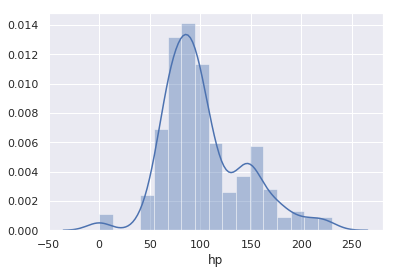

In [103]:
sns.distplot(mpg_df.hp)
# Right Skewed

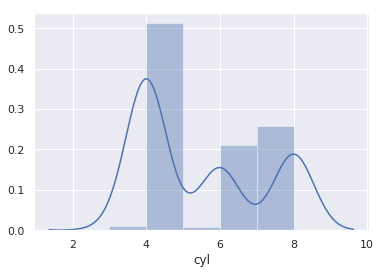

In [104]:
sns.distplot(mpg_df.cyl)
# Unevenly distributed with right skewed

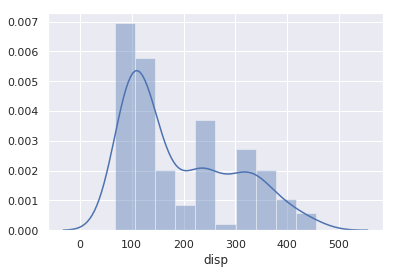

In [105]:
sns.distplot(mpg_df.disp)

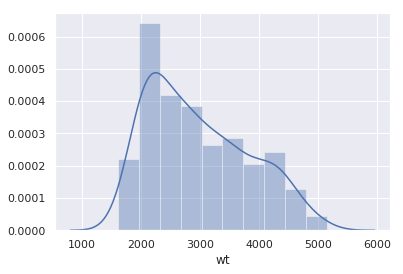

In [106]:
sns.distplot(mpg_df.wt)

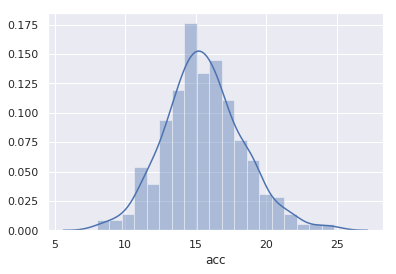

In [107]:
sns.distplot(mpg_df.acc)

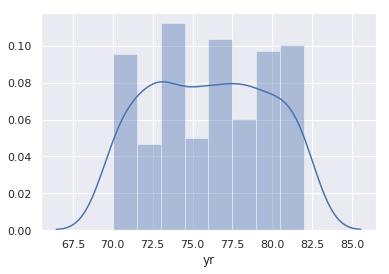

In [108]:
sns.distplot(mpg_df.yr)

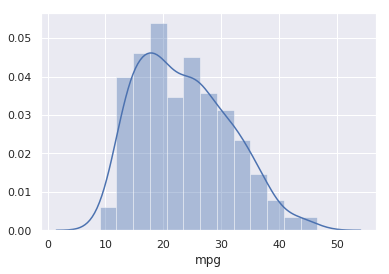

In [109]:
sns.distplot(mpg_df.mpg)

In [110]:
mpg_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.804203
hp,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.754276
wt,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267,1.000000


Weight and displacement is highly inversely correlated with the Mileage i.e., more the weight or displacement lesser is the mileage

# 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset)

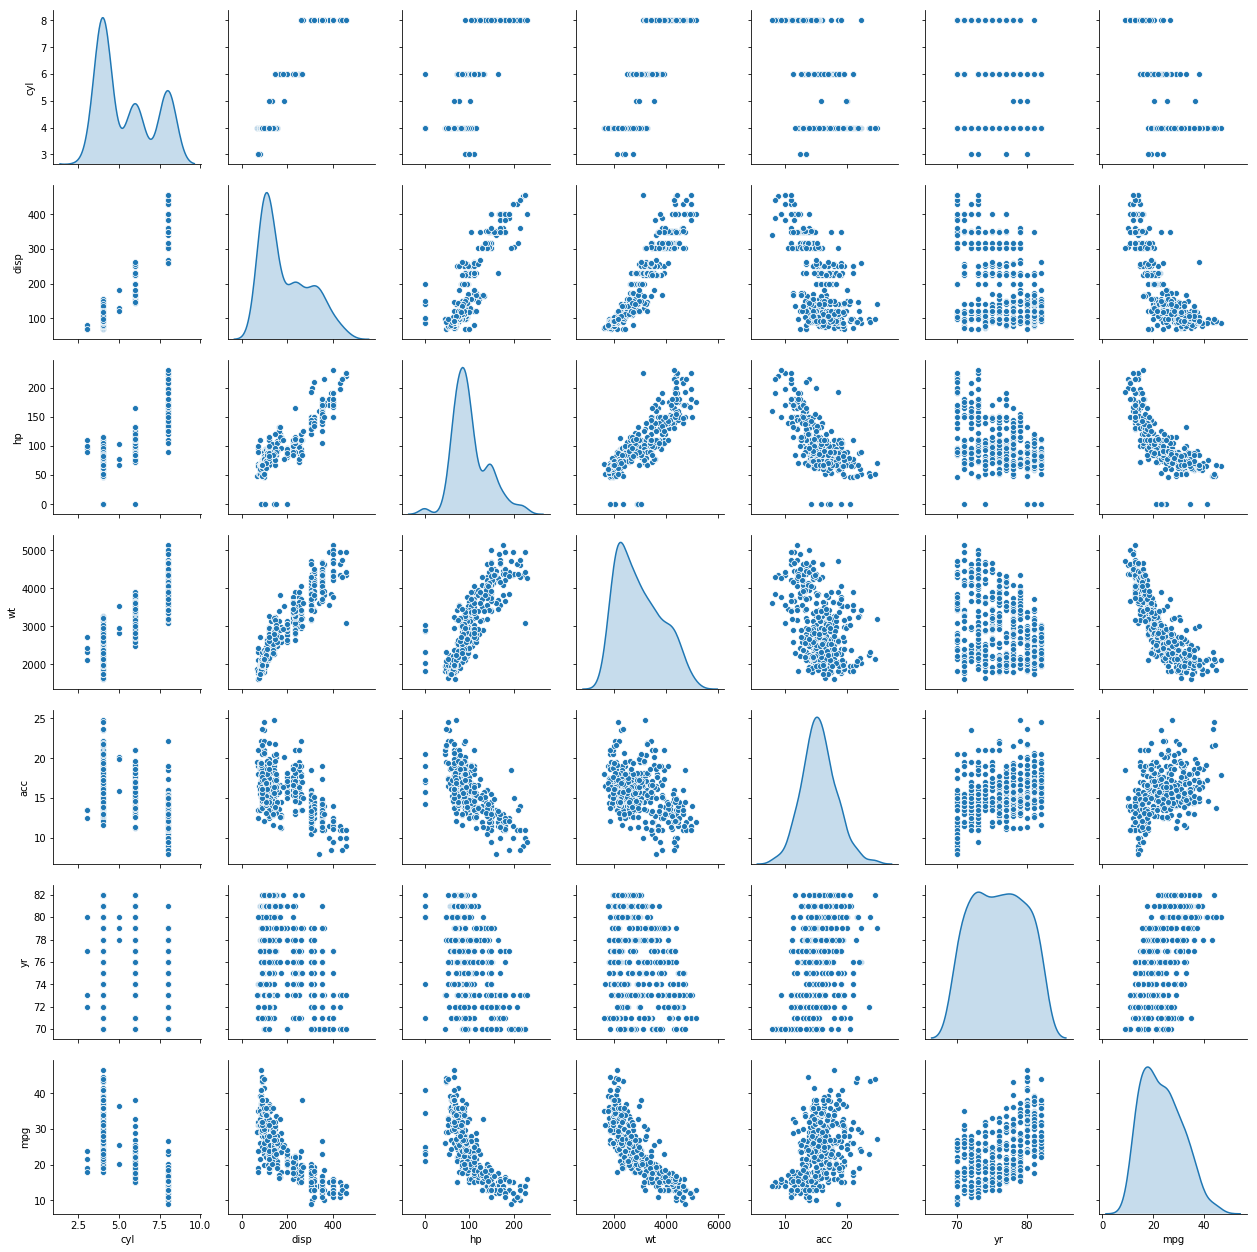

In [28]:
sns.pairplot(mpg_df, diag_kind ='kde')

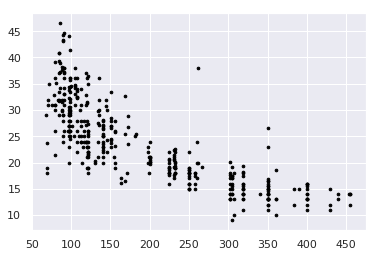

In [111]:
f1 = mpg_df['disp'].values

f2 = mpg_df['mpg'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

4 to 5 clusters can be seen from the above plots

In [0]:
mpg_df.drop('car name', axis=1, inplace=True)

In [113]:
mpg_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [0]:
from scipy.stats import zscore
mpg_df_z = mpg_df.apply(zscore)

In [0]:
from sklearn import metrics

In [0]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(mpg_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(mpg_df_z, labels, metric='euclidean'))

In [117]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,1306.300653,0.459100
1,3,960.944848,0.339159
2,4,752.860670,0.344809
3,5,679.787992,0.310133
4,6,611.573986,0.269960
5,7,560.148762,0.277378
6,8,515.667076,0.254677
7,9,470.465276,0.261903


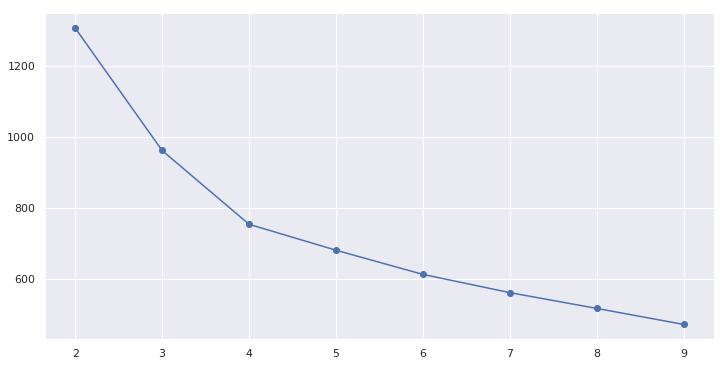

In [118]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

4 seems to be best cluster count

In [119]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(mpg_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [120]:
centroids = cluster.cluster_centers_
centroids

array([[-0.82506599, -0.78402235, -0.75275521, -0.77275084,  0.37884159,
         1.10677463,  1.18881992],
       [ 0.4267561 ,  0.31085325,  0.00541753,  0.35090666,  0.2967454 ,
         0.05812892, -0.50075266],
       [ 1.49819126,  1.50392292,  1.47938187,  1.40409797, -1.0861486 ,
        -0.68832385, -1.16379715],
       [-0.83900798, -0.7886291 , -0.53414429, -0.74406919,  0.3223385 ,
        -0.64251535,  0.19242419]])

In [121]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_z) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.825066,-0.784022,-0.752755,-0.772751,0.378842,1.106775,1.188820
1,0.426756,0.310853,0.005418,0.350907,0.296745,0.058129,-0.500753
2,1.498191,1.503923,1.479382,1.404098,-1.086149,-0.688324,-1.163797
3,-0.839008,-0.788629,-0.534144,-0.744069,0.322339,-0.642515,0.192424


In [0]:
prediction=cluster.predict(mpg_df_z)
mpg_df_z["GROUP"] = prediction

In [123]:
mpg_df_z.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,113,113,113,113,113,113,113
1,89,89,89,89,89,89,89
2,94,94,94,94,94,94,94
3,102,102,102,102,102,102,102


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36f1ff438>,
      dtype=object)

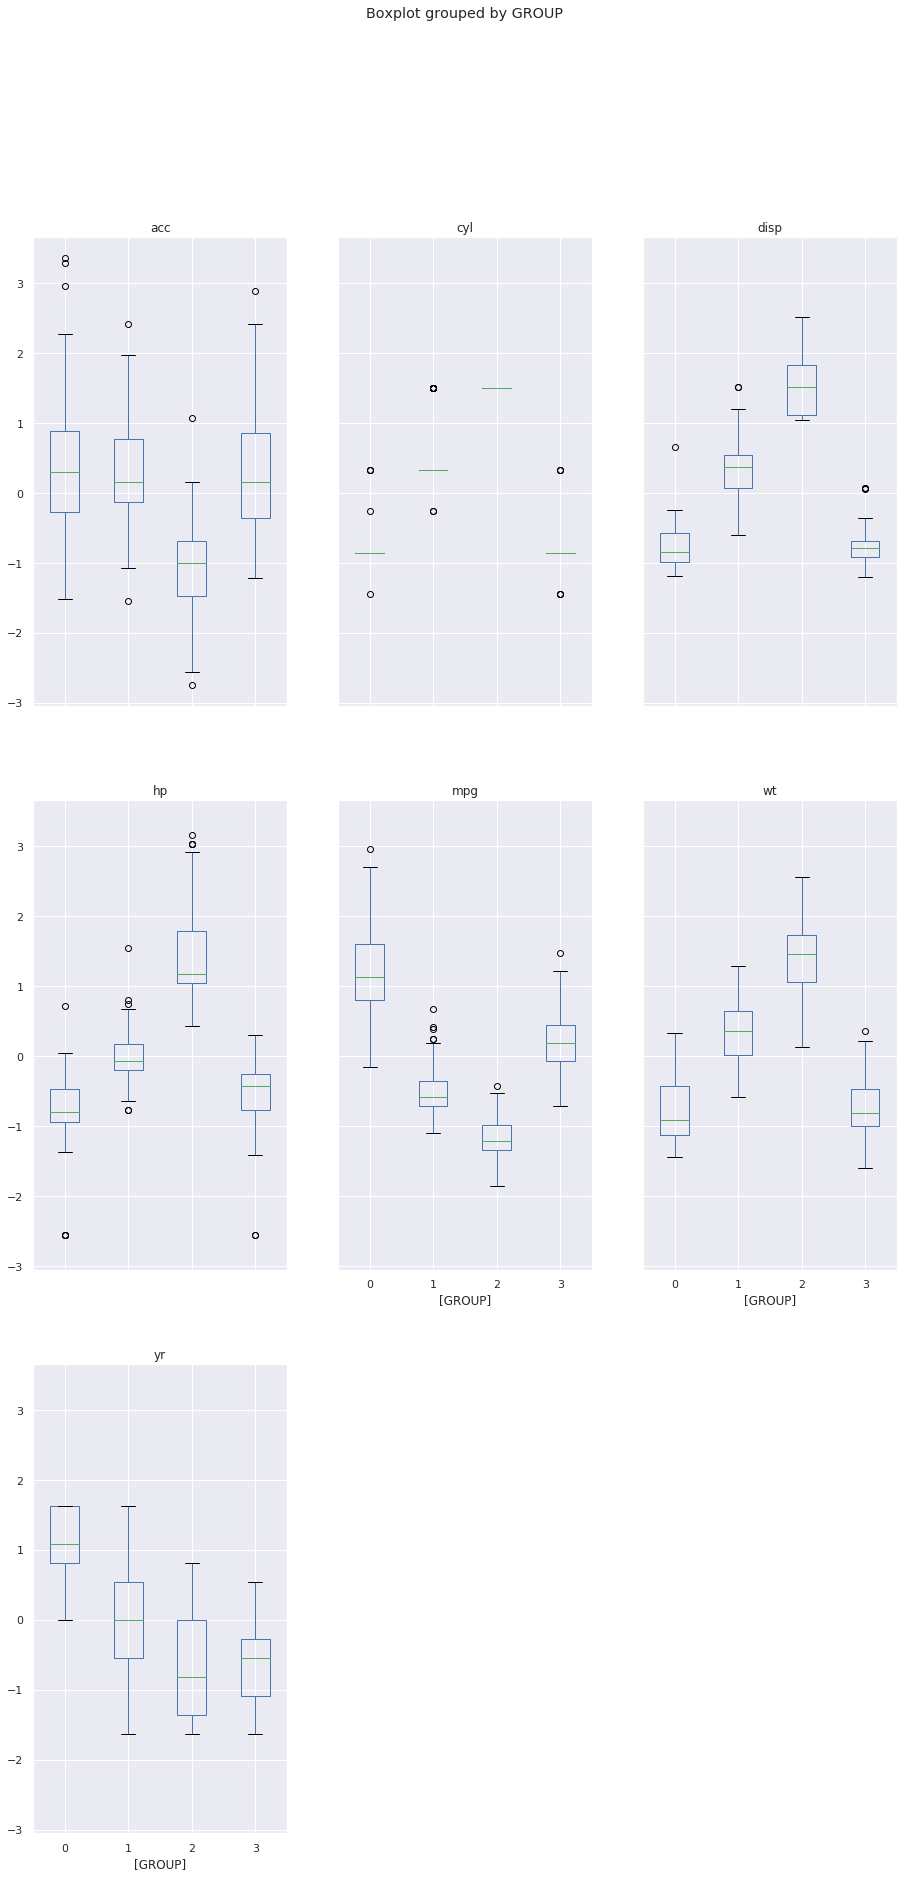

In [124]:
import matplotlib.pylab as plt

mpg_df_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

In [125]:
mpg_df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.673950,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.544187,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.171228,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.171228,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.922589,0.565841,-1.840117,-1.627426,-0.834543,2


In [0]:
array = mpg_df_z.values
X = array[:,1:7] # select all rows and first 6 columns which are the attributes
y = mpg_df_z['GROUP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [127]:
# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0 , max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = mpg_df.columns[1:9]
print(feature_names)

k = 8
top_k_idx = feature_importances.argsort()[-k:][::-1]
print(feature_names[top_k_idx], feature_importances)

Index(['disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')
Index(['yr', 'disp', 'mpg', 'hp', 'acc', 'wt'], dtype='object') [0.25548751 0.05363426 0.         0.         0.52079719 0.17008104]


In [0]:
y_pred = regressor.predict(X_test)

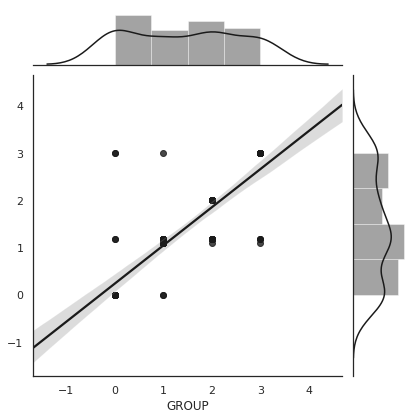

In [129]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [130]:
from sklearn import svm
clr = svm.SVR(C = 15 , degree=1, kernel='linear')  
clr.fit(X_train , y_train)

SVR(C=15, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = clr.predict(X_test)

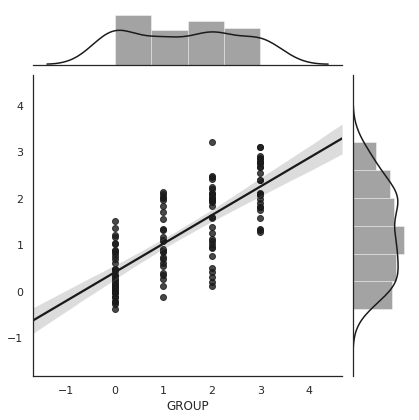

In [132]:
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
        
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 1, interaction_only=True)



X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model: [ 0.         -0.62763982  0.29775632 -0.12204886  0.03632147 -0.67326829
 -0.47783595]
0.5561206437245421
0.5653536820723528


In [134]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         -0.02501566  0.         -0.          0.         -0.70605751
 -0.        ]


In [135]:
print("Lasso score on training dataset is" , lasso.score(X_train, y_train))
print("Lasso score on test dataset is" , lasso.score(X_test, y_test))

Lasso score on training dataset is 0.47051145873574607
Lasso score on test dataset is 0.515260619460773


In [136]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

print("Model score on training dataset is" ,regression_model.score(X_train, y_train))
print("Model score on test dataset is" ,regression_model.score(X_test, y_test))

Model score on training dataset is 0.556125343163077
Model score on test dataset is 0.5651114198382006
